In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import ma
from mayavi import mlab
import ipywidgets as widgets
from IPython.display import display

ImportError: No module named vtkCommonCorePython
________________________________________________________________________________
Do you have vtk and its Python bindings installed properly?

In [4]:
time_frame = 4
path = 'y:\\tomo\\ershov\\bone_load\\syn166\\input_full\\out_'+ str(time_frame) +'\\'
path_output = 'y:\\tomo\\ershov\\bone_load\\syn166\\input_full\\analysis\\'

In [492]:
def read_3d_flow(fileName):

    print 'Reading flow file: ', fileName
    f = open(path + fileName, "rb")
    data = np.fromfile(f, dtype=np.float32)

    nx = int(data[0])
    ny = int(data[1])
    nz = int(data[2])

    # Exctract data (everything except dimensions)
    data = data[3:]

    size = 3*nx*ny*nz
    shape = (nz, ny, nx)

    print 'Vector field dimensions:', nx, ny, nz 

    # Separate u and v components and reshape to the matrix
    u = data.take(np.arange(0,size,3)).reshape(shape)
    v = data.take(np.arange(1,size,3)).reshape(shape)
    w = data.take(np.arange(2,size,3)).reshape(shape)

    return u, v, w, shape

In [493]:

u,v,w, data_size = read_3d_flow('vec_1.raw')

nx = data_size[2]
ny = data_size[1]
nz = data_size[0]

with Image.open(path + "\\mask_res.tif") as image_mask:
    mask = np.array(image_mask)

Reading flow file:  vec_1.raw
Vector field dimensions: 1240 1120 20


# Parameters

In [494]:
z_slice=10

fig_size = (10,7)
output_dpi = 150


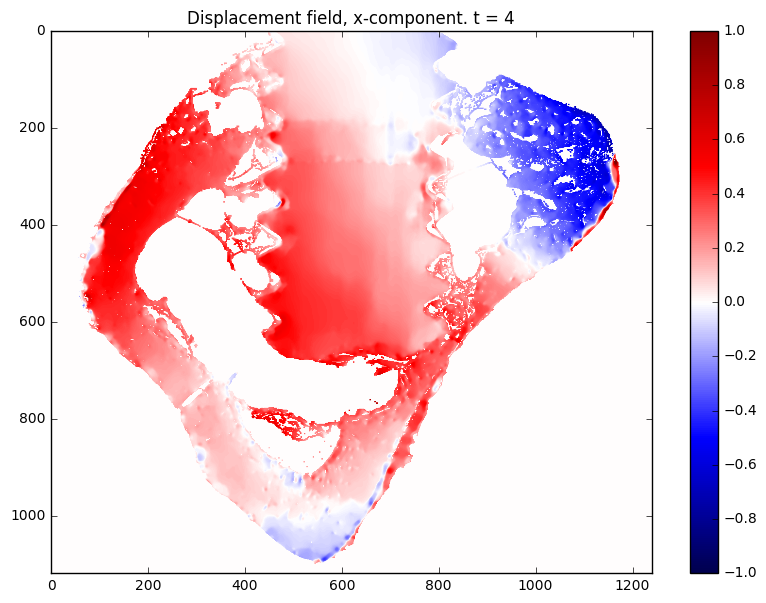

In [495]:
# Mask the image
u = u*mask / 255

plt.figure(figsize=fig_size, facecolor='w', edgecolor='k')
ax = plt.imshow(u[z_slice], vmin= -1.0, vmax=1.0, cmap='seismic')
plt.colorbar()
plt.title('Displacement field, x-component. t = ' + str(time_frame))

plt.savefig(path_output + 'frame'+str(time_frame)+ '_fig_' +'flow_x.png', dpi=output_dpi) 
plt.show()

im = Image.fromarray(u[z_slice])
im.save(path_output + 'frame'+str(time_frame)+ '_res_' +'flow_x.tif')

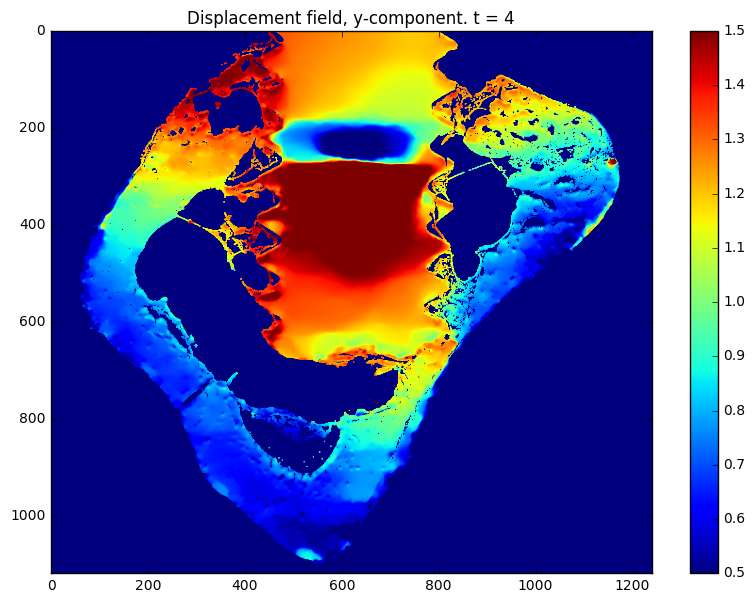

In [496]:
# Mask the image
v = v*mask / 255

plt.figure(figsize=fig_size, facecolor='w', edgecolor='k')
ax = plt.imshow(v[z_slice], vmin=0.5, vmax=1.5, cmap='jet')
plt.colorbar()
plt.title('Displacement field, y-component. t = ' + str(time_frame))

plt.savefig(path_output + 'frame'+str(time_frame)+ '_fig_' +'flow_y.png', dpi=output_dpi) 
plt.show()

im = Image.fromarray(v[z_slice])
im.save(path_output + 'frame'+str(time_frame)+ '_res_' +'flow_y.tif')

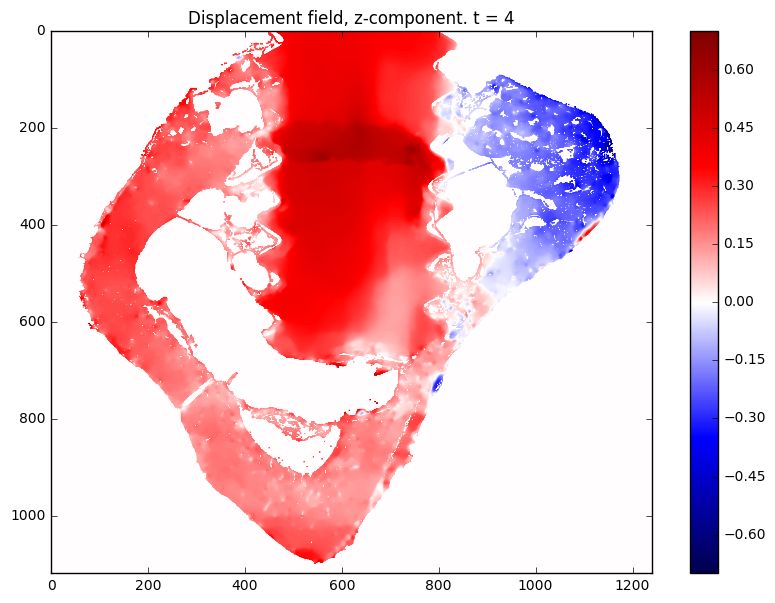

In [497]:
# Mask the image
w = w*mask / 255

plt.figure(figsize=fig_size, facecolor='w', edgecolor='k')
ax = plt.imshow(w[z_slice], vmin=-0.7, vmax=0.7, cmap='seismic')
plt.colorbar()
plt.title('Displacement field, z-component. t = ' + str(time_frame))

plt.savefig(path_output + 'frame'+str(time_frame)+ '_fig_' +'flow_z.png', dpi=output_dpi) 
plt.show()

im = Image.fromarray(w[z_slice])
im.save(path_output + 'frame'+str(time_frame)+ '_res_' +'flow_z.tif')

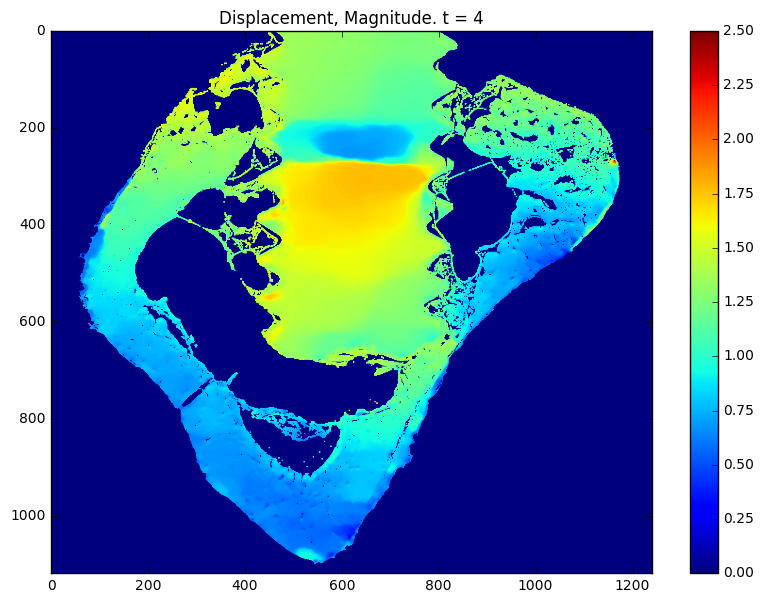

In [502]:
# Mask the image
u = u*mask / 255
v = v*mask / 255
w = w*mask / 255

amp = np.sqrt(pow(u, 2) + pow(v, 2) + pow(w,2))

plt.figure(figsize=fig_size, facecolor='w', edgecolor='k')
ax = plt.imshow(amp[z_slice], vmin=0, vmax=2.5, cmap='jet')
plt.colorbar()
plt.title('Displacement, Magnitude. t = ' + str(time_frame))

plt.savefig(path_output + 'frame'+str(time_frame)+ '_fig_' +'amp.png', dpi=output_dpi) 
plt.show()

im = Image.fromarray(amp[z_slice])
im.save(path_output + 'frame'+str(time_frame)+ '_res_' +'amp.tif')

In [503]:
show_3d = False
if show_3d:
    x = np.arange(0, nx-1, 20)
    y = np.arange(0, ny-1, 20)
    z = np.arange(0, nz-1, 10)

    #print x, y, z
    xx, yy, zz = np.meshgrid(x, y, z)

    #print xx

    print u.shape

    pu = u[zz, yy, xx]
    pv = v[zz, yy, xx]
    pw = w[zz, yy, xx]
    
    mlab.quiver3d(xx, yy, zz, pu, pv, pw, scale_factor=20.0, mode='cone')
    mlab.show()


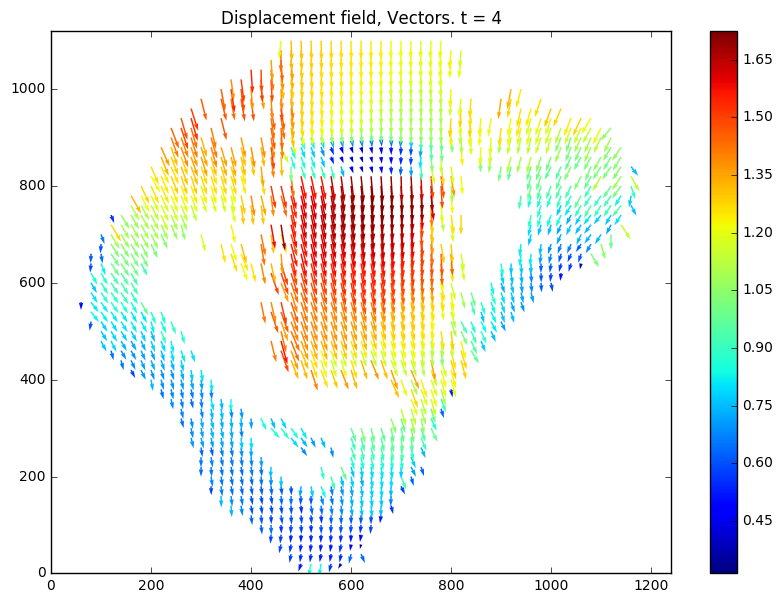

In [504]:
#Show 2D vector field
show_2d = True

if show_2d:
    x = np.arange(0, nx-1, 20)
    y = np.arange(0, ny-1, 20)
    
    xx, yy = np.meshgrid(x, y)
    
    pu = u[z_slice, yy, xx]
    pv = v[z_slice, yy, xx]
    
    pu = np.flipud(1*pu)
    pv = np.flipud(-1*pv)
    
    amp = np.sqrt(pow(pu, 2) + pow(pv, 2))
    
    threshold = 0.05
    
    masking = 1
    if masking == 1:
        m = np.where(amp <= threshold, np.ones(pu.shape), np.zeros(pu.shape))
        
        #print amp
        #print m
    
        pu = ma.masked_array(pu, mask=m)
        pv = ma.masked_array(pv, mask=m)
        amp = ma.masked_array(amp, mask=m)
        xx = ma.masked_array(xx, mask=m)
        yy = ma.masked_array(yy, mask=m)

        

    #Q = plt.quiver(xx, yy, pu, pv, amp, scale=scale.value / 10)
    plt.figure(figsize=fig_size, facecolor='w', edgecolor='k')
    Q = plt.quiver(xx, yy, pu, pv, amp, scale=40.0)
    plt.title('Displacement field, Vectors. t = ' + str(time_frame))
    plt.xlim(0,nx)
    plt.ylim(0,ny)
    plt.colorbar()
   
    
    #Q = plt.quiver(pu[z_slice], pv[z_slice])
    plt.savefig(path_output + 'frame'+str(time_frame)+ '_fig_' +'vec.png', dpi=output_dpi)  
    plt.show()


In [505]:
scale = widgets.IntSlider()
scale.value = 1.0
display(scale)

IntSlider(value=1)